##### Apply K-Means Clustering on the California Housing Dataset based on longitude, latitude and median_income
##### Optimize the Number of Clusters Using Silhouette Score: Calculate the silhouette score for different cluster configurations to evaluate the quality of clustering.
##### Analyze the Clustering Results
- Visualize the clusters using scatter plots and compare the results for different values of k.
- Discuss the distribution of data points in each cluster and their corresponding housing features (e.g., median income).
- Interpret the results and explain how the clusters represent different segments of the housing market.
##### Comparison with Other Clustering Algorithms
- Compare K-Means with another clustering algorithm, such as DBSCAN (or choose any other you want to choose), and discuss which performs better.

___________________________________________________________________________________________________________________________

Start with handleing the data


### KMeans

In [74]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set environment variable to avoid KMeans memory leak warning on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress joblib warnings
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [75]:
import pandas as pd

HOUSING_PATH = "."


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [76]:
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



###### https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


unique: Array of unique cluster numbers → [0, 1, 2, 3, 4]


counts: How many times each appears → [4515, 5546, 583, 7007, 2989]

In [79]:
from sklearn.cluster import KMeans

x = housing[["longitude", "latitude", "median_income"]].values
kmeans = KMeans = KMeans(n_clusters=5, random_state=0, n_init="auto")

housing["cluster"] = kmeans.fit_predict(x)

unique, counts = np.unique(housing["cluster"], return_counts=True)
print("Cluster distribution:")
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} data points")

print("\nCluster Centers (longitude, latitude, median_income):")
print(kmeans.cluster_centers_)

# housing[["longitude", "latitude", "median_income", "cluster"]].head(10)

Cluster distribution:
  Cluster 0: 4515 data points
  Cluster 1: 5546 data points
  Cluster 2: 583 data points
  Cluster 3: 7007 data points
  Cluster 4: 2989 data points

Cluster Centers (longitude, latitude, median_income):
[[-118.02441443   33.86733673    5.19275499]
 [-121.59867568   38.11859099    2.74432009]
 [-119.09506849   34.77056507   10.34978801]
 [-117.99189891   33.99293975    2.70649909]
 [-121.93064992   37.69250251    5.42827568]]


Silhouette Score time


k=2: Silhouette score = 0.5665
k=3: Silhouette score = 0.5139
k=4: Silhouette score = 0.4239
k=5: Silhouette score = 0.3750
k=6: Silhouette score = 0.3474
k=7: Silhouette score = 0.3778
k=8: Silhouette score = 0.3795
k=9: Silhouette score = 0.3492
k=10: Silhouette score = 0.3232


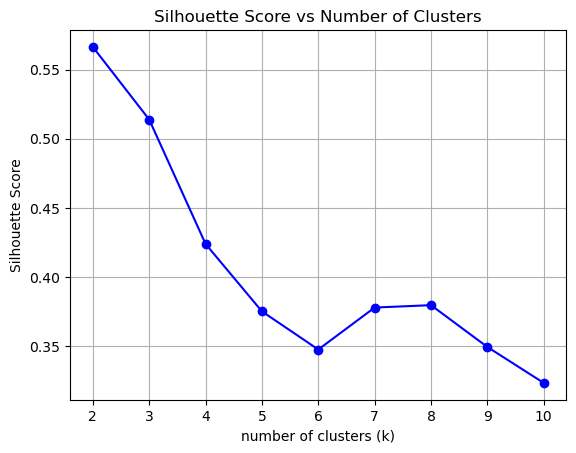

In [87]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
# start at 2 clusters and move to 10
# elbow rule often starts at 2, bigger dataset >10.000 use less clusters larger <10.000 use more.
K_range = range(2, 11)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = kmeans_temp.fit_predict(x)
    score = silhouette_score(x, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette score = {score:.4f}")

# plots
plt.Figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, "bo-")
plt.xlabel("number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

Cluster distribution: {np.int32(0): np.int64(11943), np.int32(1): np.int64(8697)}
Cluster centers (lon, lat, income):
 [[-118.0072438    33.93969106    3.92219439]
 [-121.71575207   37.95606601    3.79990337]]


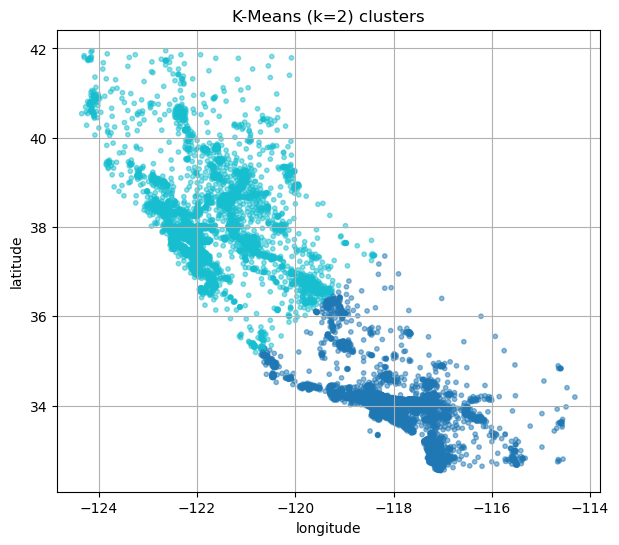

In [92]:
from sklearn.cluster import KMeans

kmeans_opt = KMeans(n_clusters=2, random_state=0, n_init="auto")
housing["cluster"] = kmeans_opt.fit_predict(
    housing[["longitude", "latitude", "median_income"]].values
)
unique, counts = np.unique(housing["cluster"], return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))
print("Cluster centers (lon, lat, income):\n", kmeans_opt.cluster_centers_)

plt.figure(figsize=(7, 6))
plt.scatter(
    housing["longitude"],
    housing["latitude"],
    c=housing["cluster"],
    s=10,
    cmap="tab10",
    alpha=0.5,
)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("K-Means (k=2) clusters")
plt.grid(True)
plt.show()

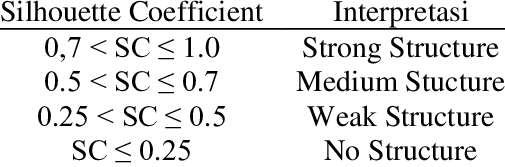

Looks like K=2 is the best score 

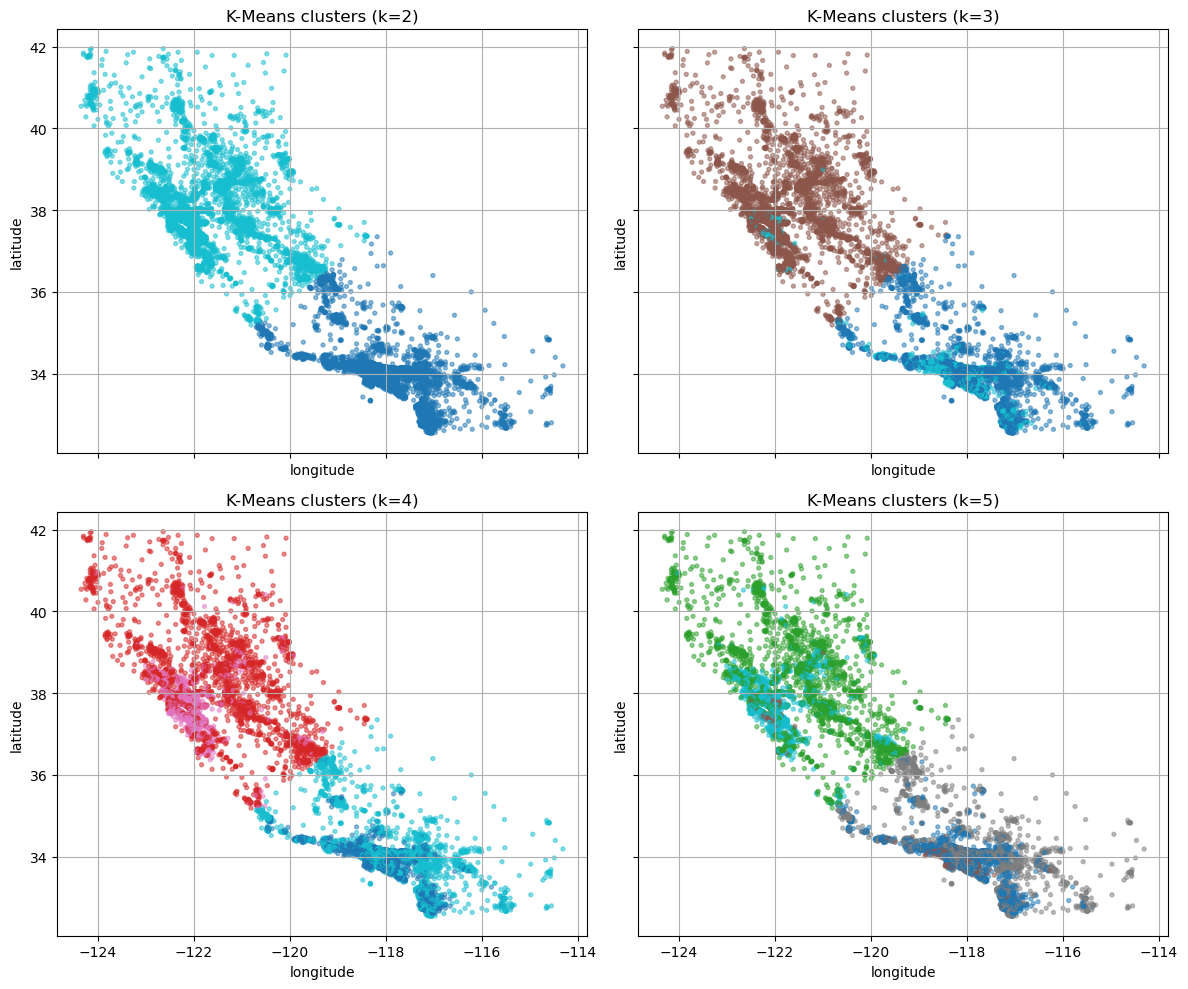

In [106]:
from sklearn.cluster import KMeans

ks_to_show = [2, 3, 4, 5]  # change as needed
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)

for ax, k in zip(axes.ravel(), ks_to_show):
    km = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = km.fit_predict(x)
    ax.scatter(
        housing["longitude"],
        housing["latitude"],
        c=labels,
        s=8,
        cmap="tab10",
        alpha=0.5,
    )
    ax.set_title(f"K-Means clusters (k={k})")
    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")
    ax.grid(True)

plt.tight_layout()
plt.show()

### DBSCAN


In [111]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set environment variable to avoid KMeans memory leak warning on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress joblib warnings
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [112]:
import pandas as pd

HOUSING_PATH = "."


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [113]:
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

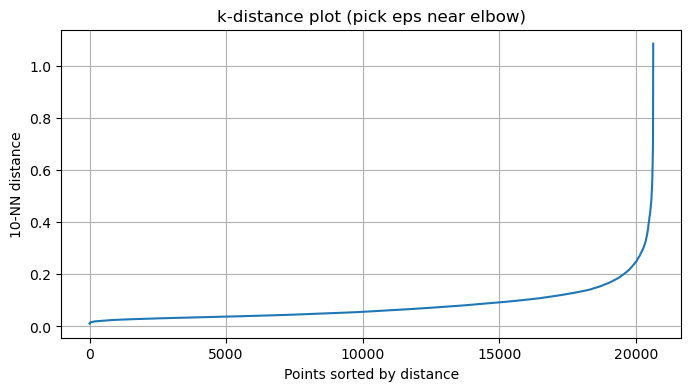

In [123]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

x = housing[["longitude", "latitude", "median_income"]].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

min_sampels = 10
nbrs = NearestNeighbors(n_neighbors=min_sampels).fit(x_scaled)
distances, _ = nbrs.kneighbors(x_scaled)
k_dist = np.sort(distances[:, -1])


n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

plt.figure(figsize=(8, 4))
plt.plot(k_dist)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_sampels}-NN distance")
plt.title("k-distance plot (pick eps near elbow)")
plt.grid(True)
plt.show()

Based on the graph above we can invoke the elbow rule and its around 0.3 to 0.35


DBSCAN label distribution (-1=noise): {np.int64(-1): np.int64(86), np.int64(0): np.int64(20492), np.int64(1): np.int64(18), np.int64(2): np.int64(8), np.int64(3): np.int64(36)}
Estimated number of clusters: 4
Estimated number of noise points: 86


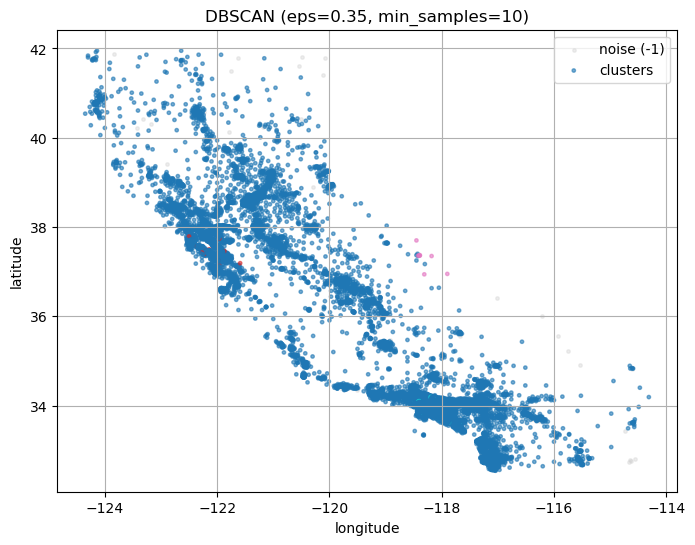

Silhouette (excluding noise): -0.0357


In [ ]:
from sklearn.cluster import DBSCAN

eps = 0.32
db = DBSCAN(eps=eps, min_samples=min_sampels).fit(x_scaled)
db_labels = db.labels_
housing["dbscan_label"] = db_labels

unique, counts = np.unique(db_labels, return_counts=True)
print("DBSCAN label distribution (-1=noise):", dict(zip(unique, counts)))
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
n_noise = int(np.sum(db_labels == -1))
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

mask_noise = db_labels == -1
plt.figure(figsize=(8, 6))
plt.scatter(
    housing.loc[mask_noise, "longitude"],
    housing.loc[mask_noise, "latitude"],
    s=6,
    c="lightgray",
    alpha=0.4,
    label="noise (-1)",
)
plt.scatter(
    housing.loc[~mask_noise, "longitude"],
    housing.loc[~mask_noise, "latitude"],
    s=6,
    c=db_labels[~mask_noise],
    cmap="tab10",
    alpha=0.6,
    label="clusters",
)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title(f"DBSCAN (eps={eps}, min_samples={min_sampels})")
plt.grid(True)
plt.legend()
plt.show()

if n_clusters >= 2 and np.any(~mask_noise):
    sil = silhouette_score(x_scaled[~mask_noise], db_labels[~mask_noise])
    print(f"Silhouette (excluding noise): {sil:.4f}")